In [2]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

### Exercise 2: The Phenomenon of Over-Rotation

**Objective:** Demonstrate that Grover's algorithm is periodic (sinusoidal). Unlike classical search, running the algorithm "longer" does not necessarily improve the result; probabilities can decrease if you iterate too many times.

**Task:**

1. Use the original 4-qubit marked states: `["0110", "1001"]`.
2. We calculated the optimal number of iterations was **2**.
3. **Experiment:** Manually force the simulation to run for **5 iterations** (which is significantly more than optimal).
4. **Question:** Compare the histogram from this run with the optimal run. What happened to the probability of measuring the marked states?


Running with 5 iterations (Optimal is ~2)


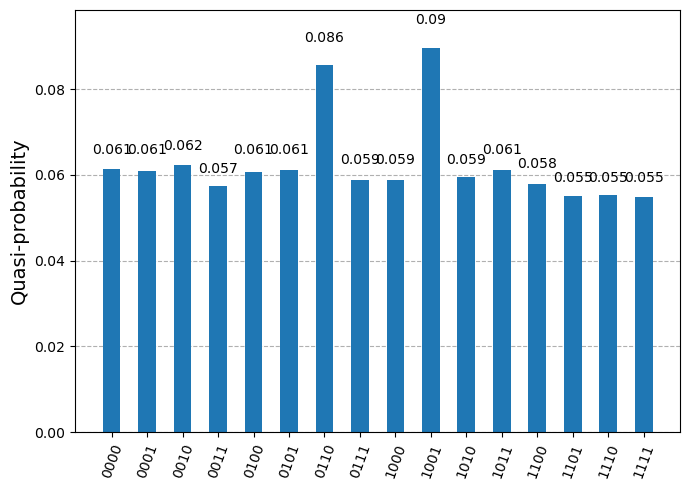

In [5]:
# [Student add you code below:]

# Step 1. Setup standard problem for 4-qubit marked states by setting oracle and grover_op
marked_states_ex2 = ["0110", "1001"]
oracle_ex2 = Grover_oracle(marked_states_ex2)
grover_op_ex2 = Grover_operator(oracle_ex2)



# Step 2. FORCE 5 iterations (Over-rotation)
forced_iterations = 5
print(f"Running with {forced_iterations} iterations (Optimal is ~2)")


qc_ex2 = QuantumCircuit(grover_op_ex2.num_qubits)
qc_ex2.h(range(grover_op_ex2.num_qubits))
qc_ex2.compose(grover_op_ex2.power(forced_iterations), inplace=True)
qc_ex2.measure_all()

# Step 3. Run on backend using the fake provider and 10000 shots
data_ex2 = Get_Data_from_Fake_backend(10000, qc_ex2, FakeAlgiers())


# Step 4. Plot the results
plot_distribution(data_ex2.meas.get_counts())